# Performance Test Analysis

### Setup

In [1]:
from util import *

### Load data

In [2]:
all_data = load_data("data")
max_depth_data = all_data.loc[all_data['depth'] == 6]

Loaded test cases: 
  data\base.csv
  data\it_nimo.csv
  data\it_nimo_noalloc.csv
  data\noalloc.csv
  data\turbo2.csv
  data\turbo4.csv
  data\turbo5.csv


In [3]:
#display(all_data)

In [4]:
display(max_depth_data)

,session,case,case_name,depth,time,nodes,branching,cutoffs,checkmates,draws,dynamic_allocs
5,base,0,Start state,6,13.41,3135482,22.70,8.36,0,0,52330673.0
11,base,1,Early game 1,6,15.85,1882719,39.00,22.05,1,0,71427748.0
17,base,2,Early game 2,6,130.27,19632972,44.29,26.24,1184,0,798617032.0
23,base,3,Mid game 1,6,23.36,5627462,23.04,12.11,0,0,148315600.0
29,base,4,Mid game 2,6,3.11,609601,22.52,16.77,3,0,12730236.0
35,base,5,Late game 1,6,0.28,85467,16.47,9.22,0,0,1221580.0
41,base,6,Late game 2,6,0.95,325669,7.30,4.80,497,19,4548262.0
47,it_nimo,0,Start state,6,9.23,1616463,23.84,14.78,1,0,NaN
53,it_nimo,1,Early game 1,6,1.28,147491,29.47,23.92,0,0,NaN
59,it_nimo,2,Early game 2,6,3.74,322207,44.86,34.11,0,0,NaN


## Search time

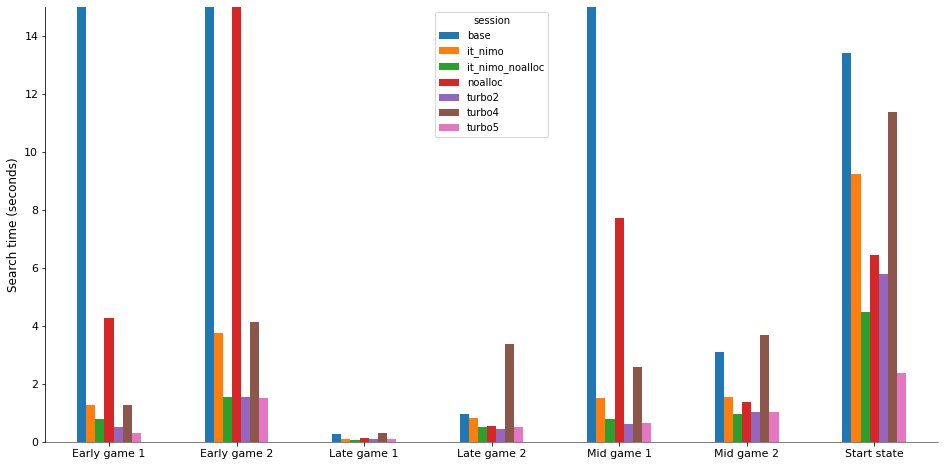

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,15.85,130.27,0.28,0.95,23.36,3.11,13.41
it_nimo,1.28,3.74,0.10,0.81,1.51,1.56,9.23
it_nimo_noalloc,0.78,1.53,0.07,0.52,0.79,0.97,4.46
noalloc,4.28,39.62,0.13,0.55,7.71,1.36,6.44
turbo2,0.52,1.55,0.09,0.43,0.60,1.02,5.79
turbo4,1.28,4.13,0.32,3.36,2.59,3.67,11.36
turbo5,0.30,1.51,0.09,0.51,0.66,1.04,2.39


In [11]:
bar_chart(max_depth_data.pivot('case_name','session', 'time'), ylabel="Search time (seconds)",  ymax=15) 
display(max_depth_data.pivot('session','case_name','time'))

## Nodes visited

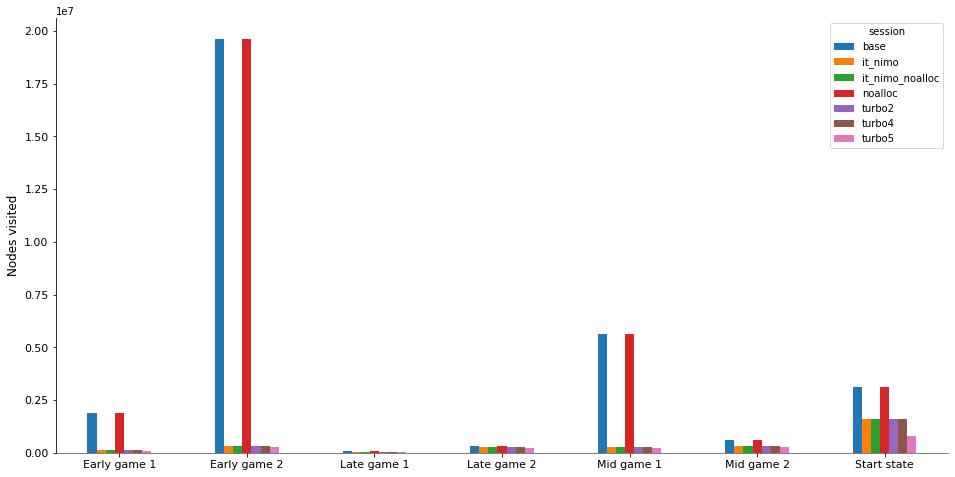

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,1882719,19632972,85467,325669,5627462,609601,3135482
it_nimo,147491,322207,27669,275981,253131,307714,1616463
it_nimo_noalloc,147491,322207,27669,275981,253131,307714,1616463
noalloc,1882719,19632972,85467,325669,5627462,609601,3135482
turbo2,148015,332132,28055,276190,253388,308139,1616464
turbo4,148015,332132,28850,280213,253043,309990,1616464
turbo5,84078,293068,22673,243760,215867,268158,819400


In [6]:
bar_chart(max_depth_data.pivot('case_name','session', 'nodes'), ylabel="Nodes visited")
display(max_depth_data.pivot('session','case_name','nodes'))

## Branching factor

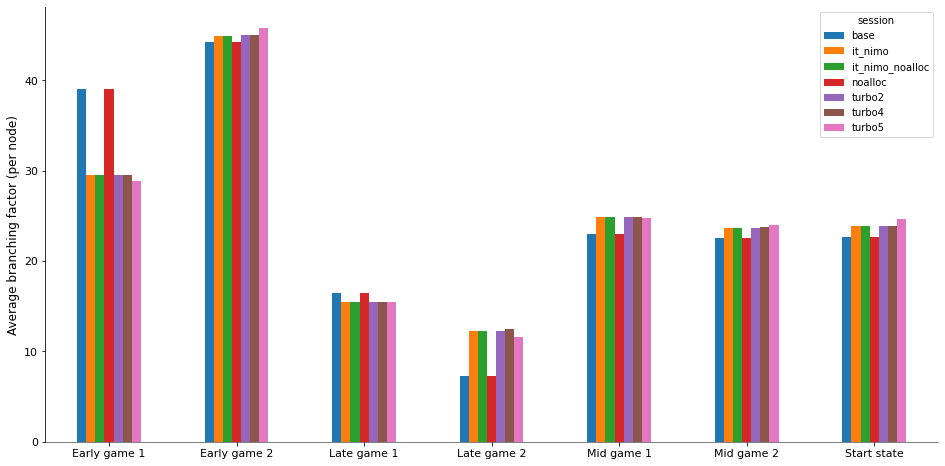

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,39.00,44.29,16.47,7.30,23.04,22.52,22.70
it_nimo,29.47,44.86,15.47,12.24,24.82,23.71,23.84
it_nimo_noalloc,29.47,44.86,15.47,12.24,24.82,23.71,23.84
noalloc,39.00,44.29,16.47,7.30,23.04,22.52,22.70
turbo2,29.51,45.06,15.44,12.26,24.85,23.71,23.84
turbo4,29.51,45.06,15.51,12.46,24.86,23.78,23.84
turbo5,28.87,45.83,15.49,11.58,24.80,24.02,24.69


In [7]:
bar_chart(max_depth_data.pivot('case_name','session', 'branching'), ylabel="Average branching factor (per node)")
display(max_depth_data.pivot('session','case_name','branching'))

## Cutoff factor

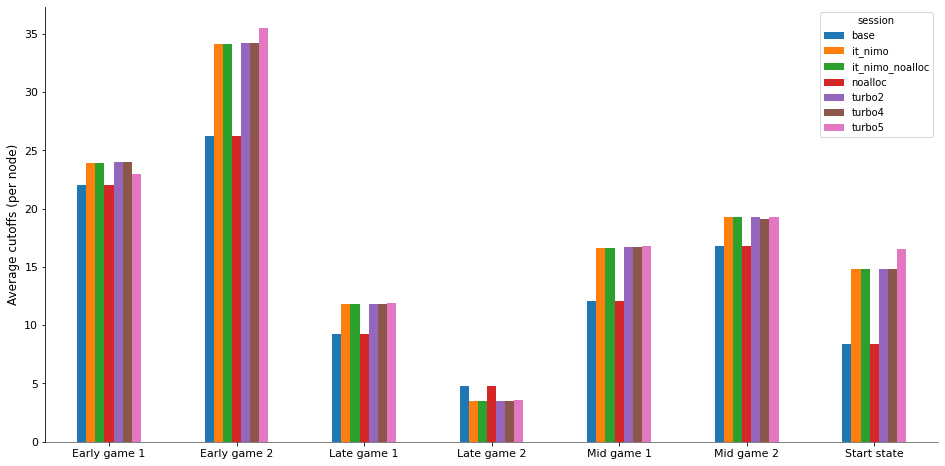

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,22.05,26.24,9.22,4.80,12.11,16.77,8.36
it_nimo,23.92,34.11,11.86,3.50,16.64,19.28,14.78
it_nimo_noalloc,23.92,34.11,11.86,3.50,16.64,19.28,14.78
noalloc,22.05,26.24,9.22,4.80,12.11,16.77,8.36
turbo2,23.96,34.24,11.79,3.52,16.68,19.28,14.78
turbo4,23.96,34.24,11.85,3.50,16.70,19.11,14.78
turbo5,22.96,35.52,11.88,3.60,16.80,19.30,16.52


In [8]:
bar_chart(max_depth_data.pivot('case_name','session', 'cutoffs'), ylabel="Average cutoffs (per node)")
display(max_depth_data.pivot('session','case_name','cutoffs'))

## Dynamic Allocations

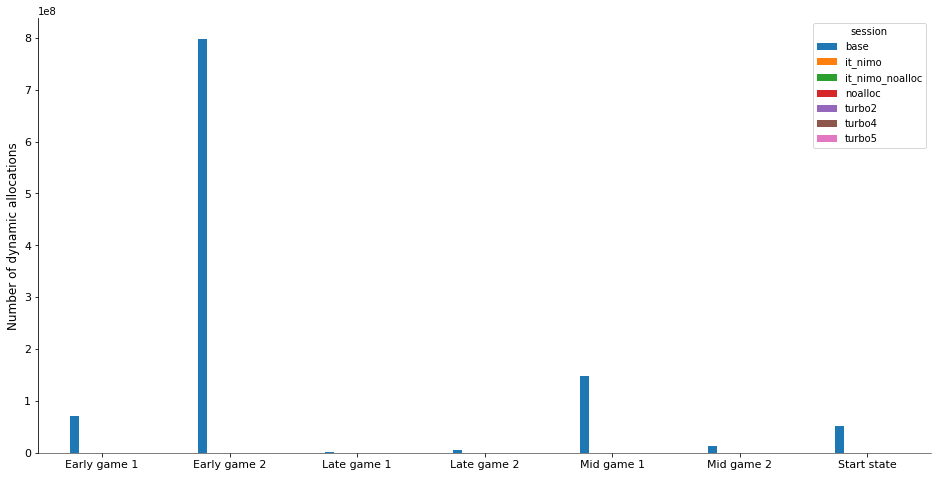

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,71427748.0,798617032.0,1221580.0,4548262.0,148315600.0,12730236.0,52330673.0
it_nimo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
it_nimo_noalloc,0.0,0.0,0.0,0.0,0.0,0.0,0.0
noalloc,0.0,0.0,0.0,0.0,0.0,0.0,0.0
turbo2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
turbo4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
turbo5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
bar_chart(max_depth_data.pivot('case_name','session', 'dynamic_allocs'), ylabel="Number of dynamic allocations")
display(max_depth_data.pivot('session','case_name','dynamic_allocs'))

## Visited nodes per depth

__Note__: This is not the number of visited nodes on each depth, but the number of nodes visited when you do a search to the given depth.

In [10]:
000099visited_nodes_at_depth(all_data)

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (Temp/ipykernel_18984/2769414428.py, line 1)